# ***<font color="RoyalBlue">SNP解析（SNPcaster） Notebook</font>***


<br>
<br>

***

# ***<u><font color="RoyalBlue">解析手順</font></u>***

<font color="DarkOrange">※ 解析前にデータのQuality check(grape_qc_asembl)を行うことを推奨</font>

## 1. 入力ファイルのアップロード

解析プロジェクトのフォルダへ、FASTQファイルをアップロードしてください。  
左サイドバー上部の⬆︎ボタンから、または、解析プロジェクトフォルダを開きファイルをドラック＆ドロップでアップロードできます。
<br>


使用できるファイルの拡張子は、`fastq.gz`です。<br>
ファイル名は、菌株名で始まるようにしてください。<br>
たとえば、以下のようなフォーマットに対応しています。

- イルミナフォーマット（e.g., strain_S00_L001_R1_001.fastq.gz）
- シンプルフォーマット（e.g., strain_R1.fastq.gz）

<br>

#### - 全ての株でFASTQ（ショートリードがある） → <font color="Lime"> <b>Go to 3</b></font><br>
#### - FASTQがなく、FASTAしかない株がある → <font color="Lime"><b>Go to 2</font></b>



<br>

## 2. FASTAからのFASTQの作製
コンティグや完全長配列しかない場合には、art_fq_generator.shでFASTQファイルを作製します。

### 2.1. FASTAファイルをプロジェクトフォルダにアップロードします。<br>
### 2.2. FASTAファイルのリストを「3. 菌株リスト作製」に従って作製します。
### 2.3. 下記セル内のリスト部分（「list = "list_art"」のダブルクオートで囲まれた部分）を作製したリスト名に、拡張子部分（「file_extension = ".fasta"」のダブルクオートで囲まれた部分）を変えて、実行。
<br>

#### FASTQ作製後 → <font color="Lime"> <b>Go to 3</b></font><br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>


In [ ]:
####################################################
# パラメータを設定
####################################################
list = "list_art"
# FASTAファイルの拡張子(ドット付き)を入力
file_extension = ".fasta"

####################################################
# Run art_fq_generator (変更不要)
####################################################

!bash art_fq_generator.sh $list $file_extension
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>
<br>

## 3. 菌株リストの作製

次のいずれかの方法で、菌株リストを作製します。

### 3.1. Jupyter Labで作製する
- 左サイドバー上部の「 + 」ボタン→「Other」の「Text file」を押下し、ファイルを新規作製できる。
- 編集が完了したら、Ctrl＋s（Mac:Command+s）を押下し、ファイル名を設定して保存する。
### 3.2.  Notepad、メモ帳、Vim等(何でも良い)で作製して、解析フォルダにコピーする。
- Windowsで作製すると、正常に動かない可能性があります。（改行コードの違いのため）
- LinuxまたはMacで作製してください。
### 3.3. 下記コマンドで作製する。       
- 「file_name = 」の後に、リスト名をダブルクオート(")で囲って入力してください（例, "ファイル名") 
- 「user_input = ("""」の後に、菌株リストを入力してください（1行に1つの株名）。

#### コマンド実行後 → <font color="Lime"> <b>Go to 4</b></font><br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>

In [ ]:
# リストのファイル名を入力
file_name = "list.txt"

# 菌株リストを貼り付ける
user_input = ("""
A0001
A0002
A0003
A0004
A0005
A0006
A0007
A0008
"""
)

####################################################
# ※以下は変更しないでください※
####################################################

# 前後の改行を除去後に改行追加
user_input = user_input.strip("\n") + "\n"

# 入力された要素をファイルに書き込む
with open(file_name, "w") as file:
    file.write(user_input)
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>
<br>

## 4. FASTQリストの作製

3.で作製した菌株リスト中の各菌株に紐づくFASTQファイル名(ショートリードデータのファイル名)一覧の作製を以下の手順で行います。

### 4.1. find_strain_pairs.pyの実行
- 「file_name = 」の後に、前の項で作製した株名リスト名をダブルクオート(")で囲って入力してください。 
- `パラメータを設定`に記載されている内容で修正したいものがあれば修正し、実行してください。
    - 記載されている内容のまま実行することも可能です。

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>

In [ ]:
import subprocess

####################################################
# パラメータを設定(こだわりがなければ変更不要です)
####################################################
# 2.で作製した菌株リストのファイル名を入力
file_name = "list.txt"
# FASTQファイルの拡張子を入力
file_extension = "fastq.gz"
# 作製するFASTQリストのファイル名
fastq_list_name = "list_fastq.tsv"
# ペアが見つからなかった菌株一覧のファイル名
unpaired_list = "unpaired_fastq.tsv"

####################################################
# Run find_strain_pairs.py
# ※以下は変更しないでください※
####################################################
command = [
    "find_strain_pairs.py", file_name,
    "--file_extension", file_extension,
    "--paired_list", fastq_list_name,
    "--unpaired_list", unpaired_list
]
subprocess.run(command, capture_output=False, text=True)
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>
<br>

### 4.2. FASTQリストの確認・修正
- `list_fastq.tsv`(FASTQリスト)を開いて確認し、各菌株名に対し2つのFASTQファイル(Read1と2)名が正しく記載されていることを確認します。
- `unpaired_fastq.tsv`を開いて確認し、FASTQファイルのペアが見つからなかった菌株がないか確認します。
    - あった場合、`list_fastq.tsv`にその菌株名をコピーして、タブ区切りでFASTQファイルのペアを記載してください。
- FASTQリストの記載例は以下の通りです(各列はタブ区切り、改行コードは\n)。

```plaintxt
strain1	strain1_R1.fastq.gz	strain1_R2.fastq.gz
strain2	strain2_R1.fastq.gz	strain2_R2.fastq.gz
```

#### 確認後 → <font color="Lime"> <b>Go to 5</b></font>

## 5. 参照配列の用意

解析プロジェクトのフォルダへ、参照配列ファイルをアップロードしてください。 </br>
左サイドバー上部の⬆︎ボタンから、または、左サイドバーにて解析プロジェクトフォルダを開いた状態でファイルをドラック＆ドロップでアップロードできます。 </br>
Sakai株(EHEC)を使いたい場合、[Sakai株(EHEC)を使う場合](#Sakai株(EHEC)を使う場合)をお読みください。

#### 参照配列は複数（複数の染色体、プラスミドを含める、ドラフトゲノム） → <font color="Lime"><b>Go to 6</b></font>
#### 参照配列は1つである。リピート領域の除去を<font color="Tomato">行う</font> → <font color="Lime"><b>Go to 7</b></font>
#### 参照配列は1つである。リピート領域の除去を<font color="Tomato">行わない</font> → <font color="Lime"><b>Go to 8</b></font>

※ごく近縁な株でなければ、ほとんどの場合プラスミド配列はコアゲノムから除かれるので、染色体のみを参照配列として用いれば問題ありません。

#### Sakai株(EHEC)を使う場合
EHECのSakai株の参照配列は、Create Projectで使った`CreateProject.ipynb`ファイルが配置されたフォルダにある`sample_data`の中に、<br>
`stec/Sakai_BA000007.fasta`という名前で配置されています。<br>
ご利用になる場合は以下の手順でプロジェクトフォルダにコピーしてください。

1. `CreateProject.ipynb`ファイルが配置されたフォルダの`sample_data`->`stec`フォルダへ移動(画像左)
2. `Sakai_BA000007.fasta`ファイルを右クリックし、`Copy`をクリック(画像真ん中)
3. 自身が作製したプロジェクトフォルダに戻り、何もない場所で右クリックし、`Paste`をクリックするとコピーされます(画像右)

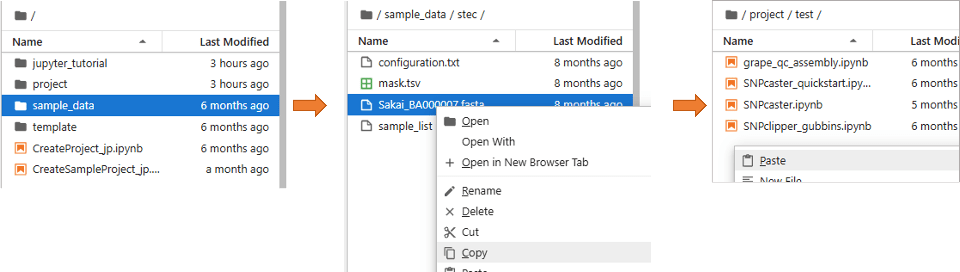


## 6. 参照配列をつなげて一つのFASTAファイルにする
ドラフトゲノム等の配列間を100個のNでつなぎ、1本の配列にします。<br>
染色体とプラスミド、などファイルが分かれている場合は、ファイルを結合して（マルチFASTAにして）から下記プログラムを実行します。

下記セル内のリスト部分（「fasta = 'DRR147072.fasta'」のクオートで囲まれた部分）を参照配列のファイル名に変えて、実行します。

出力される[入力ファイル名]_N100.fastaを参照配列として用います。
（ファイル名は変更してもいい）<br>
#### → <font color="Lime"><b>Go to 8.</b></font>
※この方法で作った参照配列を使う時には、<font color="Tomato"><b>リピート領域の除去およびGubbinsによる組換え領域の除去は行えません</b></font>

<br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>

In [ ]:
####################################################
# パラメータを設定
####################################################
fasta = 'DRR147072.fasta'


####################################################
# Run N_combine (変更不要)
####################################################

!bash n_combine.sh $fasta
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>

<br>

## 7. リピート領域の検出

リピート領域をSNP検出の対象外としたい(=マスクしたい)場合、以下の手順でマスクする領域を記載したファイルを作製してください。<br>
マスク領域の指定はオプションなので、不要であれば次のステップに移行してください。

### 7.1.ファージなど除きたい部分があれば下記のような記載の`phage.tsv`ファイルを作製し、解析プロジェクトフォルダにアップロードします。

`※特に指定したい領域がなければ、phage.tsvは作製不要です。`
<br>
```
# 例. 参照配列名[タブ区切り開始位置[タブ区切り終了位置
chrom	Start	End
Sakai_BA000007	300042	310627
Sakai_BA000007	310628	323514
```
<br>

`※開始位置、終了位置とは「何番目の塩基から何番目の塩基まで」を意味します。`

### 7.2. `repeat_detect.sh`を実行し、`mask.tsv`を作製します。<br>

下記セル内「reference = 'Sakai_BA000007.fasta'」のクオートで囲まれた部分を参照配列のファイル名に変えて、実行します。
`
<br>
#### → <font color="Lime"><b>Go to 8.</b></font>


<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>


In [ ]:
####################################################
# パラメータを設定
####################################################
reference = 'Sakai_BA000007.fasta'

####################################################
# Run repeat_detect (変更不要)
####################################################
!bash repeat_detect.sh $reference
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>

<br>

## 8. 既にSNPcasterを行ったサンプルがあるか

過去に同じ条件(同一の参照配列、同一のオプション)でSNPcasterを実行したSNPフォルダがあれば、そのフォルダを利用することで、SNPcasterの解析を短時間で完了できます。

### ない
#### → <font color="Lime"><b>Go to 9</b></font>

### ある
→ 解析の結果得られる株名フォルダ（SNPフォルダ）を、今回解析するフォルダに移動。<br>
　あるいは、SNPフォルダがあるフォルダに移動する <br>
  詳細は 12. 再解析 をご参照ください

#### → <font color="Lime"><b>Go to 9</b></font>

## 9. SNPcasterの実行

### 9.1.	<b>SNPcaster</b>を実行する。
下記セル内の参照配列（reference = 'Sakai_BA000007.fasta'のシングルクオート内）およびリスト部分（「list = "list.txt"」のダブルクオート内）を作製したリスト名に変えて、実行する。

#### オプション
    *指定が必須でない。指定しなければ、デフォルト値で実行される。
    ※clustered SNPは、組換え領域と考えてSNPから除去する領域。

|パラメータ|説明|
|---|---|
|-r|参照配列のファイル名（例．ref.fasta）|
|-i|菌株リスト（例．list）|
|-a*|BactSNPの--allele_freqの値(デフォルトは0.9)|
|-c*|隣接SNP (clustered SNP) で削除したい間隔(0を指定すると削除しない。デフォルトは0)|
|-d*|マスクファイル(指定しない場合はマスク処理を行わない)|
|-f*|fastq listのパス(BactSNPを実行する菌株がある場合は必須)|
|-g*|gubbins実行するか否か (1:実行、0:実行しない) (デフォルトは0) |
|-j*|BactSNPのジョブ数（デフォルトは4） |
|-t*|スレッド数 (デフォルトは8) |

#### ファイルフォーマット
fastq listは以下のように菌株名とそれに紐づくRead1・2ファイル名を記載したtsv(タブ区切り)ファイルを指定する。
```
strain1 strain1_R1.fastq.gz strain1_R2.fastq.gz
strain2 strain2_R1.fastq.gz strain2_R2.fastq.gz
```

<br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font>

In [ ]:
####################################################
# パラメータを設定
####################################################
# 参照配列ファイル
reference = 'Sakai_BA000007.fasta'
# 菌株リストファイル
list = "list.txt"
# BactSNPのアレル頻度(--allele_freqの値)
allele_freq = 0.9
# 隣接SNP (clustered SNP) で削除したい間隔
cluster = 0
# gubbins実行する=1、しない=0
gubbins = 0
# BactSNPのジョブ数
jobs = 4
# スレッド数
threads = 8
# fastq リストを使用しない場合、以下のfastq_listの前に#を追加してください
fastq_list = "list_fastq.tsv"
# mask処理を行う場合、以下の行頭の#を削除し、そのファイルパスを""の間に入力してください
#mask = "mask.tsv"

####################################################
# Run SNPcaster
####################################################

extra_options = ""
extra_options += f"-f {fastq_list} " if 'fastq_list' in locals() and fastq_list else ""
extra_options += f"-d {mask} " if 'mask' in locals() and mask else ""

!bash snpcaster.sh \
    -r $reference \
    -i $list \
    -a $allele_freq \
    -c $cluster \
    -g $gubbins \
    -j $jobs \
    -t $threads $extra_options
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>


### 9.2. 出力

実行後、snpcaster\_[日付]\_[時間]\_[リスト名]のフォルダが作製されます。<br>

***<font color="Red">※
    FASTQファイルが存在しない場合、エラーが出て終了します。<br>
    FASTQファイルがない株のリストとして”missing_list”が出力されます。<br></font>***

<br>
出力ディレクトリ下に、下記ファイル、フォルダが作製されます。<br>

- ファイル
  - bactsnp_list			：BactSNPを行ったサンプル一覧
  - SNPcaster_report.txt	:解析条件、コアゲノムサイズ等が記されたファイル
  - bactsnp_skip_list: 既に解析済みのサンプルフォルダが存在するため、BactSNPがスキップされたサンプルのリスト
  - 使用したリストファイル: 元のフォルダからコピーされます
  - 使用した参照配列ファイル: 元のフォルダからコピーされます
  - マスクに用いたファイル: 元のフォルダからコピーされます
  - recombination.tsv: Gubbinsによって検出された組換え領域を示すファイル

- フォルダ
  - 1_results_bactsnp：BactSNPの結果ファイル。BactSNPが実行されなければ（全株が再解析の場合）作製されない。
    - 詳細は[https://github.com/IEkAdN/BactSNP](https://github.com/IEkAdN/BactSNP)をご覧ください。

  - 2_snippy_results：Snippyの結果ファイル
    - 詳細は[https://github.com/tseemann/snippy](https://github.com/tseemann/snippy)をご覧ください。

  - 3_results_without_gubbins: cgSNP files without Gubbins. （通常はこれを使う）<br>
  
    - SNP配列。コアゲノム中で違いのある部分のみを集めたものです。系統解析等にはこれらを使います。
      - final_snp.fasta: FASTA形式。参照配列あり。
      - final_snp.nex: NEXUS形式。参照配列あり。
      - final_snp_woRef.fasta: FASTA形式。参照配列なし。
      - final_snp_woRef.nex: NEXUS形式。参照配列なし。<br>
    
    - 次のファイルはSNPの位置や、株間のSNP数が記載されています。必要に応じて確認してください。<br>
      - core.full.fasta: コアゲノム領域（core_region.tsv）の配列。
      - core_region.tsv: コアゲノム領域（全株に共通する領域）。
      - core_region_after_masking.tsv: マスク処理後のコアゲノム領域。このファイルは、マスクされた領域（mask.tsv）をcore_region.tsvから除去して作製されます。
      - core_region_final.tsv: 各種処理後のコアゲノム領域です。マスクが有効な場合はcore_region_after_masking.tsvと同じ内容、そうでなければcore_region.tsvと同じ内容です。
      - dist_final_snp.tsv: ペアワイズSNP距離（株間のSNPの数）。
      - dist_final_snp_matrix.tsv: dist_final_snp.tsvのマトリックス形式。
      - snp_position.csv: snippyによって生成されたcgSNP。このファイルの情報は、snippyが生成する「core.tab」ファイルと同じです。
      - snp_position_sample_only.csv: snp_position.csvから抽出された、サンプル間で塩基が異なるSNPのリスト。
      - snp_position_without_clusteredSNP.csv: クラスタードSNPを除いたcgSNP。クラスタードSNP距離が0に設定されている場合、このファイルは作製されません。
      - snp_position_without_clusteredSNP_sample_only.csv: snp_position_without_clusteredSNP.csvから抽出された、サンプル間で塩基が異なるSNPのリスト。
      - removed_clusteredSNP.csv: 除去されたクラスタードSNP。クラスタードSNP距離が0に設定されている場合、このファイルは作製されません。
      - snp_position_after_masking.csv: クラスタードSNPおよびマスクされた領域を除いたcgSNP。このファイルのSNPはfinal_snp.fastaと同じです。
      - snp_position_after_masking_sample_only.csv: snp_position_after_masking.csvから抽出された、サンプル間で塩基が異なるSNPのリスト。
      - masked_region.csv: マスクされた領域で除去されたcgSNP。
      - snp_position_final.csv: クラスタードSNPの除去とマスク処理が適用された後のcgSNP。
      - ※"sample_only"とファイル名に入っているファイルは、参照配列を除いた株で違いがある部分のみを抽出しています。例えば、集団感染株で解析した場合、集団感染株間での違いのみを見ることができます。<br>

  - 4_results_gubbins： Gubbinsの結果ファイル
    - 詳細は[https://github.com/nickjcroucher/gubbins](https://github.com/nickjcroucher/gubbins)をご覧ください。<br>

  - 5_results_with_gubbins: Gubbinsによる組換え領域の除去を行った後のSNPファイル等<br>
  
    - SNP配列
      - final_snp_after_gubbins.fasta: FASTA形式。参照配列あり。
      - final_snp_after_gubbins.nex: NEXUS形式。参照配列あり。
      - final_snp_after_gubbins_woRef.fasta: FASTA形式。参照配列なし。
      - final_snp_after_gubbins_woRef.nex: NEXUS形式。参照配列なし。<br>
    
    - その他ファイル
      - core_summary_with_gubbins.tsv: コアゲノム領域。
      - dist_final_snp_without_recombination.tsv: ペアワイズSNP距離。
      - dist_final_snp_matrix_without_recombination.tsv: dist_final_snp_with_gubbins.tsvのマトリックス形式。
      - recombination_region.csv: Gubbinsによって組換え領域として除去されたcgSNP。
      - snp_position_after_gubbins.csv: クラスター、マスク領域、Gubbinsで検出された組換え領域のSNPを除いたSNP位置。このファイルのSNPはfinal_snp_with_gubbins.fastaと同じです。
      - snp_position_after_gubbins_sample_only.csv: snp_position_with_gubbins.csvから抽出された、サンプル間で塩基が異なるSNPのリスト。<br>
<br>
  - サンプル名フォルダ: BactSNPの結果を菌株ごとにまとめたフォルダです。フォルダに含まれるファイルは以下の通りです。
    - snps.aligned.fa: サンプルの疑似ゲノムファイル（FASTA）。リファレンスゲノムの塩基配列を、サンプルの塩基配列で置き換えたファイル。サンプルに存在しない領域は「-」が表示されます。
    - snps.vcf: SNPの位置を示したファイル。
<br>

### 9.3. SNPcaster_report.txtの見方
SNPcaster_report.txtには、解析条件、リストファイル名の他、以下の情報が出力されます。

- Core genome size (bp)
  - コアゲノムの長さをまとめた項目。
  - Before Gubbins: Gubbins処理前のコアゲノムサイズ。
  - After Gubbins: Gubbins処理後のコアゲノムサイズ。
  - →コアゲノムサイズが著しく小さい（特に基準はないが、例えば参照配列の半分、など）場合は、参照配列の変更等を検討する。
- Number of informative SNP sites 
  - (with reference) Referenceに対するSNP数
  - (without reference) サンプル間で差異があったSNPの数
  - 共通の項目
    - No masking: マスク等の除去を行う前のSNP数
    - After cluster SNP removal: クラスタードSNP除去後のSNP数
    - After masking: マスキング後のSNP数
    - After Gubbins: Gubbinsで検出された組み換え領域除去後のSNP数
    - ※上記の順に処理が行われる。そのため、直上のフィルター処理が行われた状態での除去結果となる。
- Removed SNPs
  - マスク領域や組換え領域に含まれ、削除されたSNP数。
  - 各項目の内容は以下の通り。なお、以下のいずれの処理も行っていない場合、Removed SNPsの一覧は出力されない。
    - Clustered SNP: クラスタードSNPとして除去されたSNP数
    - Masked region: マスキングで除去されたSNP数
    - Gubbins: Gubbinsで検出された組換え領域中に含まれるため除去されたSNP数
    - ※上記の順に処理が行われる。そのため、直上のフィルター処理が行われた状態での除去結果となる。

#### その後の解析に進む →  <font color="Lime"><b>Go to 10</b></font>


## 10. SNPを用いた解析

### 10.1. ハプロタイプネットワーク図の作製
次のいずれかのファイルをPopARTで開いて解析を行います。
<br>
- 3_results_without_gubbins 
    - final_snp.nex
    - final_snp_woRef.nex
- 5_results_with_gubbins
    - final_snp_after_gubbins.nex
    - final_snp_after_gubbins_woRef.nex
<br>
※参照配列を除いた図を作りたいときには、”woRef”とついているファイルを使用します。
<br>

### 10.2. 系統樹の作製
次のいずれかのファイルを用います。(5はGubbins実行時のみ生成されます)
- 3_results_without_gubbins <br>
    - final_snp.fasta <br>
    - final_snp_woRef.fasta <br>
- 5_results_with_gubbins <br>
    - final_snp_after_gubbins.fasta <br>
    - final_snp_after_gubbins_woRef.fasta <br>

#### RAxML-NGを用いる →  <font color="Lime"><b>Go to 11.1.1.</b></font>
#### IQTREEを用いる →  <font color="Lime"><b>Go to 11.1.2.</b></font>
<br>

### 10.3. 菌株間SNPの計算
次のファイルに菌株間のSNPの数が記載されています。メモ帳、Excel等で開くことができます。
- 3_results_without_gubbins <br>
        - dist_final_snp.tsv <br>
        - dist_final_snp_matrix.tsv  <br>
- 5_results_with_gubbins<br>
        - dist_final_snp_without_recombination.tsv <br>
        - dist_final_snp_matrix_without_recombination.tsv <br>


## 11. 系統樹の作製

得られたSNPファイルを用いて、RAxML-NGまたはIQTREEを用いて最尤法系統樹を作製します。<br>
* 必要に応じて、参照配列の名前（デフォルトではRef）を変更します。
* 参照配列を含まない系統樹を作製する際には、”woRef”とついているファイルを使用します。

### 11.1. 最尤法系統樹作製
※RAxML-NG、IQTREEのどちらを用いても問題ありません。<br/>
※ただし、RaxML-NGの仕様で、<u><font color="Red">サンプルが3株以下だとエラーが発生します。</font></u><br/>
　3株で系統樹を作製したい場合、[SNPcaster.ipynbの11.1.2. IQTREE](#iqtree-run)をご利用ください。

#### 11.1.1 RAxML-NG
ModelTest-NGによる最適な塩基置換モデル選択を行い、最適なモデルを用いてRAxML-NGで最尤法系統樹の作製を行います。

  - 下記セルで、「input=」の後に解析するSNPファイルのパスを入れてください。
  - 例. 'snpcaster_20240115_094704_list.txt/3_results_without_gubbins/final_snp.fasta'<br>
    ↑上記の例で、<u><font color="Red">"20240115_094704_list.txt"の部分は、解析ごとに異なります</u></font>ので注意してください。<br>
      また、snpcaster_20240115_094704_list<font color="Red">.txt</font>/... のように<u><font color="Red">フォルダ名に.txtが入る場合がある</u></font>のでご注意ください。
    
  - 必要に応じて、参照配列の名前（デフォルトではRef）を変えたり、削除したりしてください。
  - ご注意： RaxML-NGの仕様で、<u><font color="Red">サンプルが3株以下だとエラーが発生します。</font></u>
    - 3株で系統樹を作製したい場合、[SNPcaster.ipynbの11.1.2. IQTREE](#iqtree-run)をご利用ください。

<br>

- オプション
<br>

|パラメータ|必須か|概要|
|---|---|---|
|input|●|入力ファイル (例 xxx.fasta)。|
|threads|●|modeltest-ngのスレッド数 (例 12) ※ raxml-ngのスレッド数は自動選択|
|bootstrap|-|bootstrap (デフォルトは1,000)|

<br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font><br>
※ ログは、実行ディレクトリの`raxml-ng.log`を参照してください。（<u><font color="Red">***実行のたびに上書きされます。***</u></font>）


In [ ]:
####################################################
# パラメータを設定
####################################################
input='snpcaster_20240115_094704_list_test/3_results_without_gubbins/final_snp.fasta'
# Gubbinsを実行した結果を使いたい場合は、以下を使用してください。
# 上記のinputの行を削除⇒以下の行頭の# を消す⇒'snpcaster_20240115_094704_list_test'の箇所をSNPcasterの結果フォルダ名に変更してください。
# input = "snpcaster_20240115_094704_list_test/5_results_with_gubbins/final_snp_after_gubbins.fasta"
threads=8
bootstrap=1000

####################################################
# Run raxml-ng
####################################################
!bash raxml-ng.sh $input $threads $bootstrap > raxml-ng.log
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>

<a id="iqtree-run"></a>
#### 11.1.2. IQTREE 実行
IQTREEによる塩基置換モデル選択および最適なモデルでの最尤法系統樹の作製を自動で行います。

  - 下記セルで、「input=」の後に解析するSNPファイルのパスを入れてください。
  - 例. 'snpcaster_20240115_094704_list_test/3_results_without_gubbins/final_snp.fasta'<br>
    ↑<u><font color="Red">"20240115_094704_list_test"の部分は、解析ごとに異なります</u></font>ので注意してください。

<br>

- オプション

|変数|必須か|概要|
|---|---|---|
|input|●|入力ファイル (例 xxx.fasta)。|
|bootstrap|-|Ultrafast bootstrap replicates (>=1,000) (デフォルトで、1,000)|

- 出力
  - 作製されたiqtreeフォルダ（`iqtree_results_日付_時間`）の中に出力されます。

<br>

<font color="Tomato">────────────── 　↓↓↓ 　***コマンド実行***　 ↓↓↓　 ──────────────</font><br>
※`input`の変数について、<u><font color="Red">***適切なファイルパスになっているか***</u></font>必ず確認してください。<br>
※ ログは、実行ディレクトリの`iqtree.log`を参照してください。（<u><font color="Red">***実行のたびに上書きされます。***</u></font>）

In [ ]:
####################################################
# パラメータを設定
####################################################
input='snpcaster_20240115_094704_list_test/3_results_without_gubbins/final_snp.fasta'
# Gubbinsを実行した結果を使いたい場合は、以下を使用してください。
# 上記のinputの行を削除⇒以下の行頭の# を消す⇒'snpcaster_20240115_094704_list_test'の箇所をSNPcasterの結果フォルダ名に変更してください。
# input = "snpcaster_20240115_094704_list_test/5_results_with_gubbins/final_snp_after_gubbins.fasta"
bootstrap=1000

####################################################
# Run iqtree
####################################################
!bash iqtree.sh $input $bootstrap > iqtree.log
!echo 'Complete!'

<font color="Tomato">────────────────────────────────────────────</font>


### 11.2. 系統樹ファイルの出力先

**解析フォルダ**に以下の系統樹結果フォルダと系統樹ファイルが作製されます。

- RAxML-NG:
  - フォルダ名： raxml\_results\_[日付]\_[時間]
  - フォルダ内の`xxxx_bootstrap.nwk`(xxxxは入力ファイル名)がブートストラップ値付きの系統樹ファイルです。
- IQTREE:
  - フォルダ名： iqtree\_results\_[日付]\_[時間]
  - フォルダ内の`xxxx.contree`(xxxxは入力ファイル名)がブートストラップ値付きの系統樹ファイルです。

### 11.3. 系統樹ファイルの確認

系統樹ファイルを、MEGA、CLC Genomics Workbench等で開きます。<br>
MEGAで画像保存する場合は、Image/Copy to Clipboard。MEGAでRootを含む画像保存する場合は、Rootとなる線を選んで「Place Root on Branch」を押して、「Show Subtree Separately」を使う。<br>
<br>

## 12. 再解析
既にSNPcasterを行った株がある場合は、SNPフォルダ（株名のフォルダ）を実行フォルダに移動し、上記「9. SNPcasterの実行」を行います。<br>
SNPフォルダがある株については、BactSNPはスキップされ、SNPフォルダがない株においてのみBactSNPが実行されます。<br>
その後、リストで指定した全株でSnippyが実行され、cgSNPが抽出されます。<br>
<br>
